In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy

from datafold import DMDControl, TSCDataFrame

from pydmd import DMDc

In [40]:
def create_system(n, m):
    A = scipy.linalg.helmert(n, True)
    B = np.random.rand(n, n)-.5
    x0 = np.array([0.25]*n)
    u = np.random.rand(n, m-1)-.5
    snapshots = [x0]
    for i in range(m-1):
        snapshots.append(A.dot(snapshots[i])+B.dot(u[:, i]))
    snapshots = np.array(snapshots).T
    return {'snapshots': snapshots, 'u': u, 'B': B, 'A': A}

In [41]:
s = create_system(25, 10)
print(s['snapshots'].shape)

(25, 10)


In [42]:
X = TSCDataFrame.from_array(s['snapshots'].T)
U = TSCDataFrame.from_array(s['u'].T)

In [44]:
X.shape

(10, 25)

In [19]:
dmdc = DMDc(svd_rank=-1)
dmdc.fit(s['snapshots'], s['u'])

In [22]:
dmdcdf = DMDControl()
dmdcdf.fit(X=X, U=U);

ValueError: System time series ('X') and control time series ('U') must have identical indices.

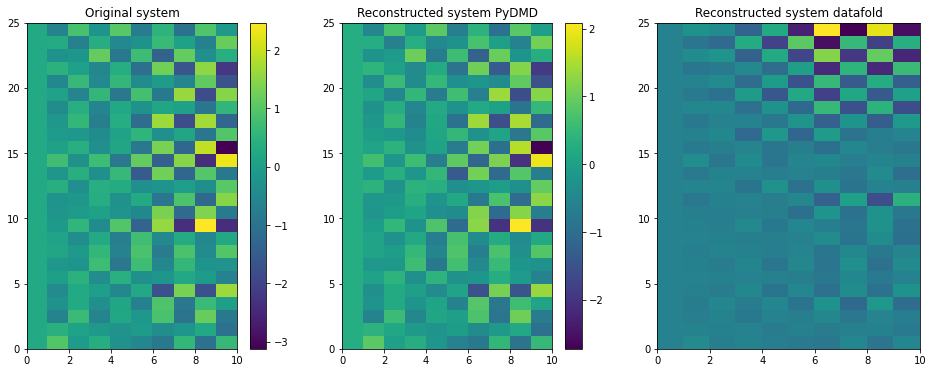

In [9]:
plt.figure(figsize=(16,6))

plt.subplot(131)
plt.title('Original system')
plt.pcolor(s['snapshots'].real)
plt.colorbar()

plt.subplot(132)
plt.title('Reconstructed system PyDMD')
plt.pcolor(dmdc.reconstructed_data().real)
plt.colorbar()

plt.subplot(133)
plt.title('Reconstructed system datafold')
plt.pcolor(dmdcdf.reconstruct(X, U=U).to_numpy())
plt.show()

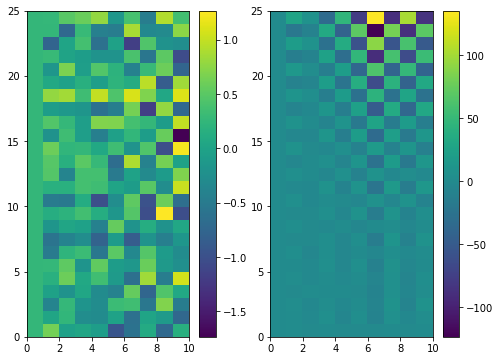

In [15]:
new_u = np.exp(s['u'])

plt.figure(figsize=(8,6))

plt.subplot(121)
plt.pcolor(dmdc.reconstructed_data(new_u).real)
plt.colorbar()


plt.subplot(122)
plt.pcolor(dmdcdf.reconstruct(X=X, U=TSCDataFrame.from_array(new_u)))
plt.colorbar()

plt.show()

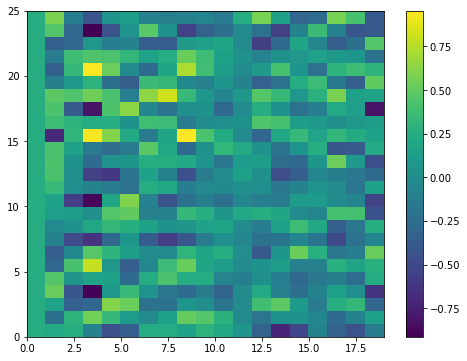

In [16]:
dmdc.dmd_time['dt'] = .5
new_u = np.random.rand(s['u'].shape[0], dmdc.dynamics.shape[1]-1)

plt.figure(figsize=(8,6))
plt.pcolor(dmdc.reconstructed_data(new_u).real)
plt.colorbar()
plt.show()